# Analyze Region 1 - Alaska

This notebook analyzes the largest glaciers in Region 1 - Alaska

In [1]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
from earthpy import clip as cl
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

# Show Region 1

In [2]:
# Open natural earth basemap TIF file
# ne_fp = 'data/natural-earth/NE1_50m_SR/NE1_50M_SR.tif' # 50 m res
ne_fp = 'data/natural-earth/NE1_HR_LC_SR_W/NE1_HR_LC_SR_W.tif' # 10 m res
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds
    ne_raster_meta = ne_src.meta

In [5]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

# Extract Region 1 - Alaska
region_1_alaska = glacier_regions[0:1]

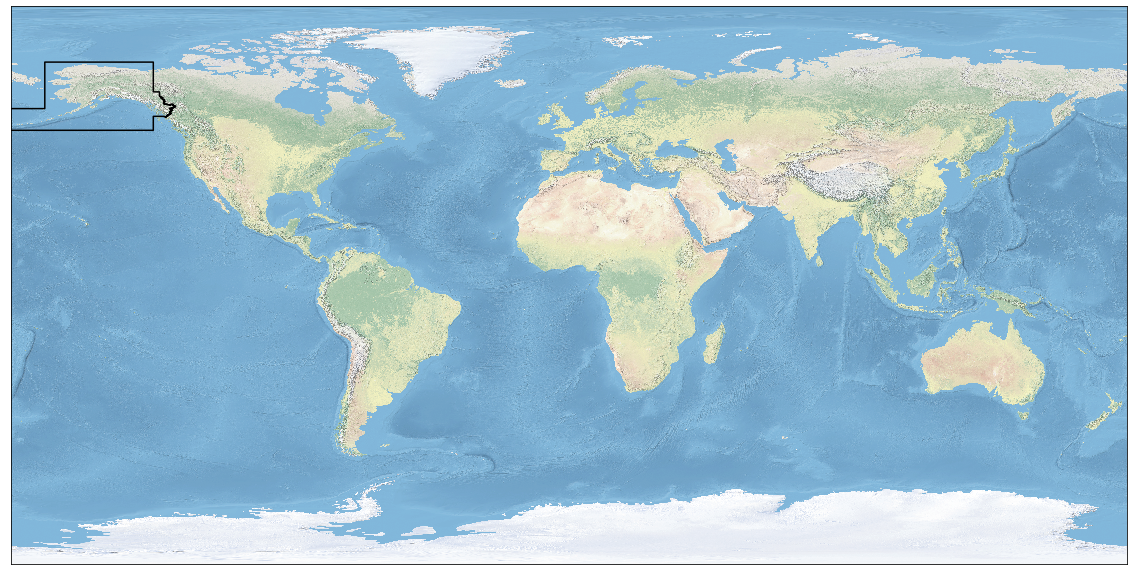

In [6]:
# Plot region 1 outline over the natural earth
# Plot natural earth basemap
fig, ax = plt.subplots(figsize=(20, 20))

# Plot natural earth
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot region 7 outline
region_1_alaska.boundary.plot(ax=ax, color="black")

plt.show()

# Glaciers

In [20]:
# Open GLIMS region 1 three largest glacier outlines.
glims_region_1_glaciers_fn = "data/glims/processed/largest/glims_region_1_largest.shp"
glims_region_1_glaciers_df = gpd.read_file(glims_region_1_glaciers_fn)

In [21]:
glims_region_1_glaciers_df

,region_no,glac_id,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,glac_name,geometry
0,1,G219787E60289N,3362.66,3362.66,0.0,0.0,0.0,6.0,0.0,5943.0,2010-09-12T00:00:00,Seward Glacier,"POLYGON Z ((-140.54114 60.609398 0, -140.54116..."
1,1,G217991E60521N,3025.11,3025.11,0.0,0.0,0.0,3.0,0.0,5381.0,2010-09-10T00:00:00,Bering Glacier,"POLYGON Z ((-140.875546 60.643679 0, -140.8743..."
2,1,G220740E60158N,2834.49,2834.49,0.0,0.0,0.0,0.0,0.0,5889.0,2010-09-14T00:00:00,Hubbard Glacier,"POLYGON Z ((-139.063473 60.304585 0, -139.0589..."


In [13]:
# Open RGI region 1 three largest glacier outlines
rgi_region_1_glaciers_fn = "data/rgi/processed/largest/rgi_region_1_largest.shp"
rgi_region_1_glaciers_df = gpd.read_file(rgi_region_1_glaciers_fn)

In [16]:
rgi_region_1_glaciers_df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-01.13696,G219572E60177N,20100912,-9999999,-140.428,60.177,1,5,3362.656,6,...,172,136989,0,0,0,0,9,9,Seward Glacier,"POLYGON ((-140.541140322 60.60939843700004, -1..."
1,RGI60-01.13635,G217928E60461N,20100910,-9999999,-142.072,60.461,1,5,3025.115,3,...,273,196819,0,0,0,2,9,9,Bering Glacier,"POLYGON ((-140.875545776 60.64367927900008, -1..."
2,RGI60-01.14443,G220499E60427N,20100914,-9999999,-139.501,60.427,1,5,2834.493,0,...,151,131321,0,0,0,1,9,9,Hubbard Glacier,"POLYGON ((-139.06347255 60.30458540800004, -13..."


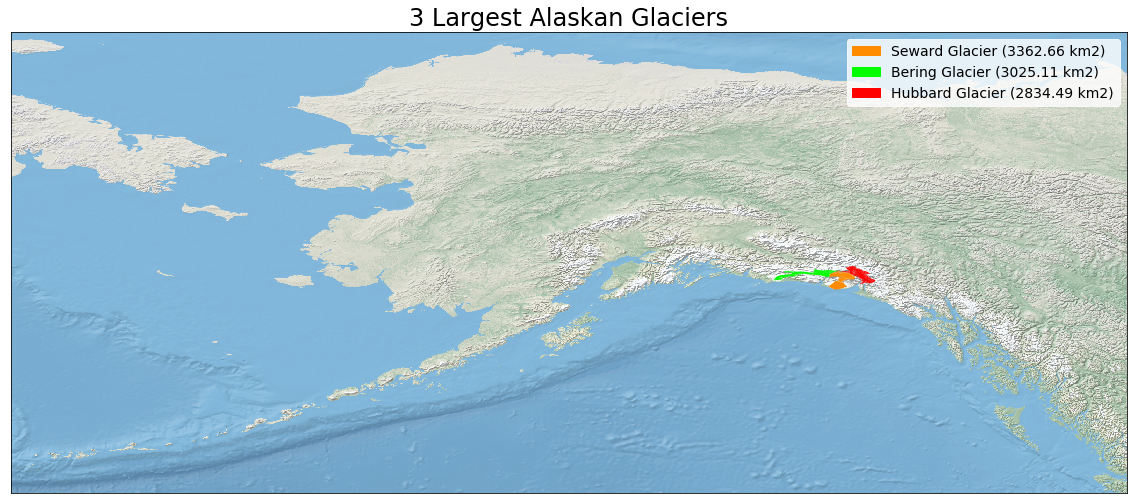

In [10]:
# Plot 3 largest Alaskan glaciers on natural earth from GLIMS
# Set up legend. Note that the sizes come from an average of GLIMS and RGI. 
# See wgms-glacier-project/data/comparison/compare-glims-rgi.xlsx
legend_colors = ['darkorange', 'lime', 'red']
legend_labels = ['Seward Glacier (3362.66 km2)',
                 'Bering Glacier (3025.11 km2)', 'Hubbard Glacier (2834.49 km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_1_alaska.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
glims_region_1_glaciers_df.iloc[0:1].plot(ax=ax, color='darkorange')
glims_region_1_glaciers_df.iloc[1:2].plot(ax=ax, color='lime')
glims_region_1_glaciers_df.iloc[2:3].plot(ax=ax, color='red')
ax.set_title('3 Largest Alaskan Glaciers', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (1.0,1.0))

plt.show()

### Create final data files

In [22]:
# Drop columns that are not needed for the final data (use GLIMS dataframe for this)
#df.drop('column_name', axis=1, inplace=True)
region_1_final_data_df = glims_region_1_glaciers_df.drop(['db_area', 'width', 'length', 'primeclass', 
                                                          'min_elev', 'mean_elev', 'max_elev'], axis=1)

In [23]:
region_1_final_data_df

,region_no,glac_id,area,src_date,glac_name,geometry
0,1,G219787E60289N,3362.66,2010-09-12T00:00:00,Seward Glacier,"POLYGON Z ((-140.54114 60.609398 0, -140.54116..."
1,1,G217991E60521N,3025.11,2010-09-10T00:00:00,Bering Glacier,"POLYGON Z ((-140.875546 60.643679 0, -140.8743..."
2,1,G220740E60158N,2834.49,2010-09-14T00:00:00,Hubbard Glacier,"POLYGON Z ((-139.063473 60.304585 0, -139.0589..."
